#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [510]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (3).csv


#EDA

In [512]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [513]:
data.shape

(400, 11)

In [514]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [515]:
data.duplicated().sum()

0

In [516]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [517]:
len(data[data['Sales']<=5])

77

In [518]:
len(data[(data['Sales']>5) & (data['Sales']<=10)])

245

In [519]:
len(data[(data['Sales']>10) & (data['Sales']<=17)])

78

In [520]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [521]:
data['Age'].unique()

array([42, 65, 59, 55, 38, 78, 71, 67, 76, 26, 50, 62, 53, 52, 63, 46, 69,
       35, 79, 54, 64, 58, 30, 44, 60, 73, 48, 32, 80, 75, 39, 61, 74, 29,
       77, 56, 47, 25, 31, 36, 41, 68, 70, 28, 43, 49, 45, 33, 34, 51, 40,
       72, 57, 27, 66, 37])

In [522]:
#converting sales into categorical variable
# category 1 when sales is greater than 0 and less than or equal to 10
# category 2 when sales is greater than 10 and less than or equal to 17

In [523]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Urban']=label.fit_transform(data['Urban'])
data['US']=label.fit_transform(data['US'])
data['ShelveLoc']=label.fit_transform(data['ShelveLoc'])

In [524]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [525]:
data['Sales_category']=data['Sales'].apply(lambda x : 1 if 0<=x<=10 else 2 if 10<x<=17 else 0)

In [526]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,2
2,10.06,113,35,10,269,80,2,59,12,1,1,2
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [527]:
len(data[data['Sales_category']==1])

322

In [528]:
len(data[data['Sales_category']==2])

78

In [529]:
len(data[data['Sales_category']==0])

0

In [530]:
data.drop('Sales', axis=1, inplace=True)

In [531]:
data.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,1


In [532]:
data.shape

(400, 11)

In [533]:
data.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
Sales_category    int64
dtype: object

#Visualization

In [534]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

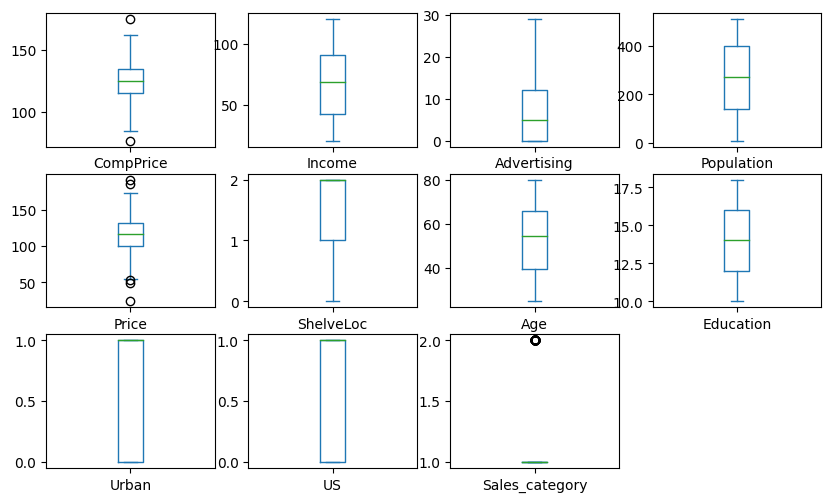

In [535]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8))
plt.show();

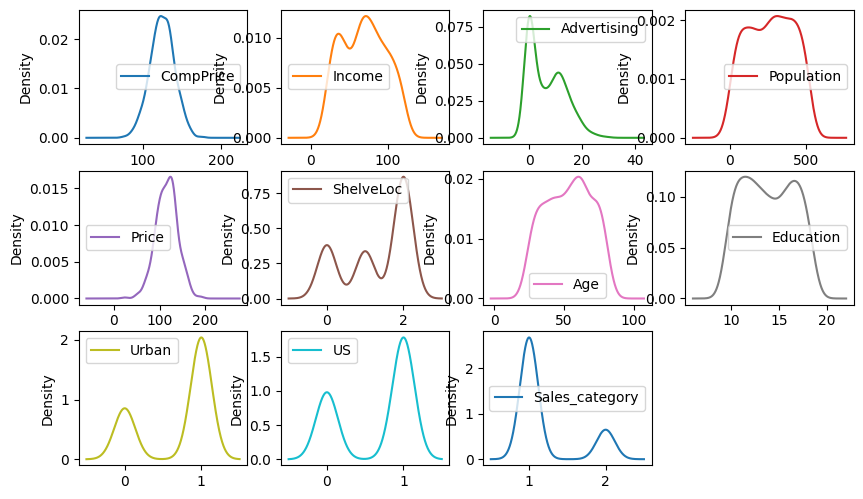

In [536]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,8))
plt.show();

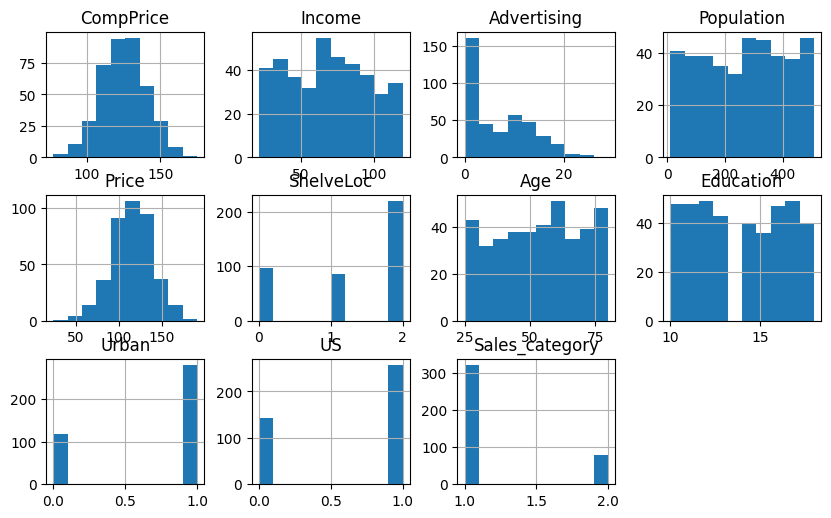

In [537]:
data.hist(layout=(4,4), figsize=(10,8))
plt.show();

In [538]:
# to understand factors influencing high sales
data.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,1


<Axes: xlabel='Sales_category'>

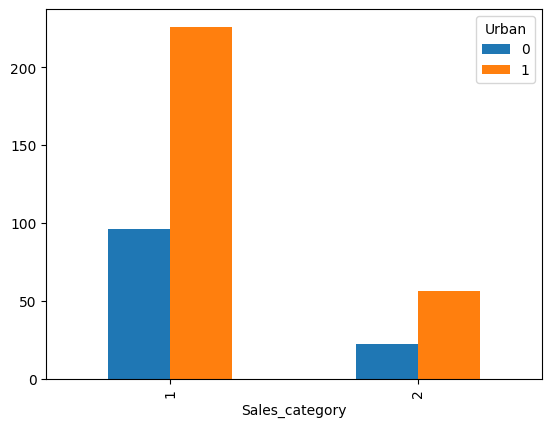

In [539]:
pd.crosstab(data['Sales_category'],data['Urban']).plot(kind='bar')

<Axes: xlabel='Sales_category'>

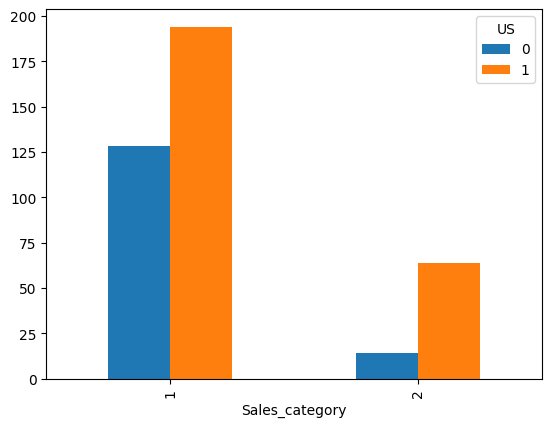

In [540]:

pd.crosstab(data['Sales_category'],data['US']).plot(kind='bar')

<Axes: xlabel='ShelveLoc'>

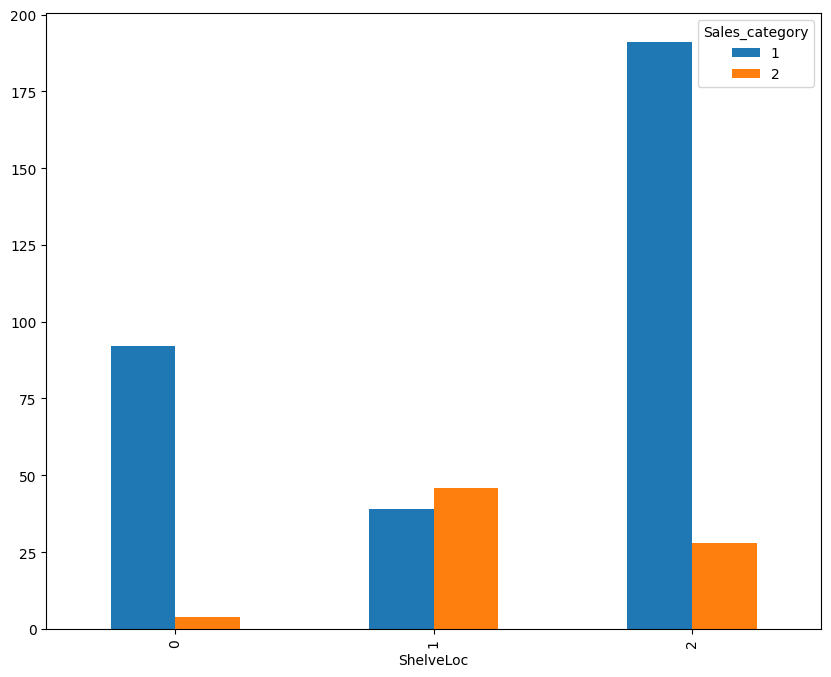

In [541]:
pd.crosstab(data['ShelveLoc'], data['Sales_category']).plot(kind='bar', figsize=(10,8))

<Axes: ylabel='Sales_category'>

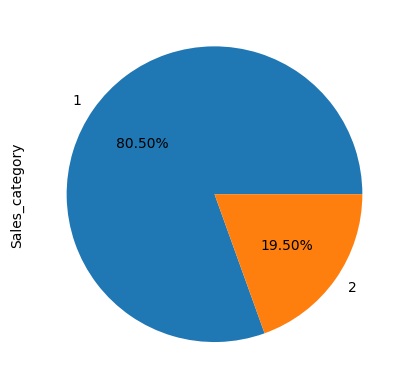

In [542]:
data['Sales_category'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='ShelveLoc'>

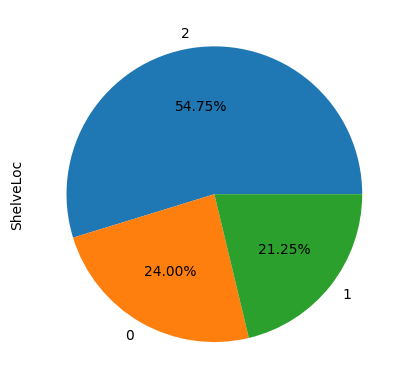

In [543]:
data['ShelveLoc'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#MODEL BUILDING

In [544]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [545]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [546]:
X=data.drop('Sales_category', axis=1)
Y=data['Sales_category']

In [547]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [548]:
X_train.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
336,138,35,6,60,143,0,28,18,1,0


In [549]:
X_train.shape

(320, 10)

In [550]:
X_test.shape

(80, 10)

In [551]:
Y_train.shape

(320,)

In [552]:
Y_test.shape

(80,)

#Performing GridSearch to find best criterion and accuracy

In [553]:
from sklearn.model_selection import GridSearchCV
criterion=['entropy','gini']
max_depth=range(1,10)
param_grid=dict(criterion=criterion,max_depth=max_depth )
model=DecisionTreeClassifier()
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10)})

In [554]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2}
0.84375


In [555]:
model=DecisionTreeClassifier(criterion='gini', max_depth=2)
model.fit(X_train, Y_train)
pred=model.predict(X_test)

In [556]:
model.feature_importances_

array([0.        , 0.        , 0.19768144, 0.        , 0.55833933,
       0.24397923, 0.        , 0.        , 0.        , 0.        ])

In [557]:
X_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [558]:
# the top 3 important features for estimating sales are ShelveLoc=24%, Price=55%, Advertising=19%

In [559]:
pd.Series(pred).value_counts()

1    74
2     6
dtype: int64

In [560]:
Y_test.value_counts()

1    62
2    18
Name: Sales_category, dtype: int64

In [561]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test, pred)
score

0.8

In [562]:
pred_train=model.predict(X_train)
train_acc=accuracy_score(Y_train, pred_train)
train_acc

0.85

In [563]:
X_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

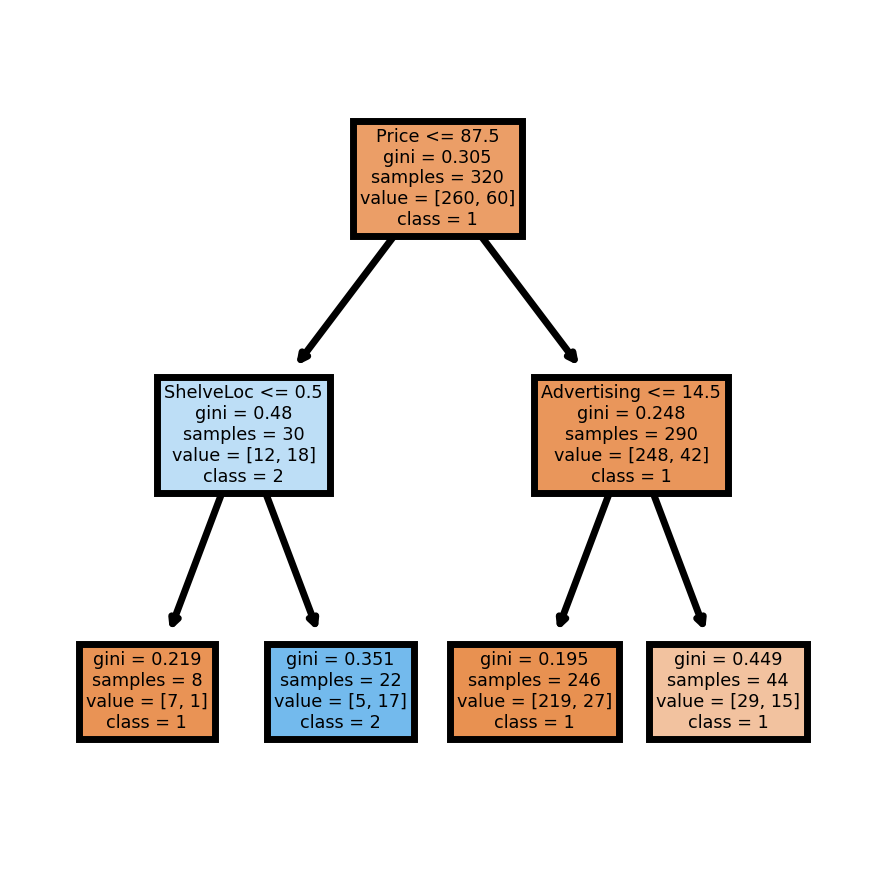

In [564]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['1','2']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=500)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show();

In [565]:
# INFERENCE- the sales category is coverted into categorical variable. 2 categories were created then model was build using gini as criterion and max_depth of 2. THe train accuracy is 85% and test accuracy is 80%
# the top 3 important features for estimating sales are ShelveLoc=24%, Price=55%, Advertising=19%
#when 3 categories for sales was created,  the accuracy decreased to 60%

#Use decision trees to prepare a model on fraud data
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [566]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (2).csv


In [619]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [620]:
data.shape

(600, 6)

In [621]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [622]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [623]:
data.duplicated().sum()

0

In [624]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [625]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [626]:
data['Work.Experience'].unique()

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 25,
       26,  7, 27,  5, 21, 23,  1, 22,  2, 11,  9, 24, 17, 20])

In [627]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [628]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Undergrad']=label.fit_transform(data['Undergrad'])
data['Marital.Status']=label.fit_transform(data['Marital.Status'])
data['Urban']=label.fit_transform(data['Urban'])

In [629]:
# Undegrad, 0=No 1=Yes
#Marital status 0=Divorced, 1=Married, 2=Single
#Urban 0=NO, 1=YES

In [630]:
data['Taxable.Income']=data['Taxable.Income'].apply(lambda x: 0 if x<=30000 else 1)     #0 = RISKY, 1=GOOD

In [631]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


In [632]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[['City.Population', 'Work.Experience']]=scaler.fit_transform(data[['City.Population', 'Work.Experience']])

In [633]:
data.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,0.139472,0.333333,1


#Visualization

<Axes: xlabel='Taxable.Income'>

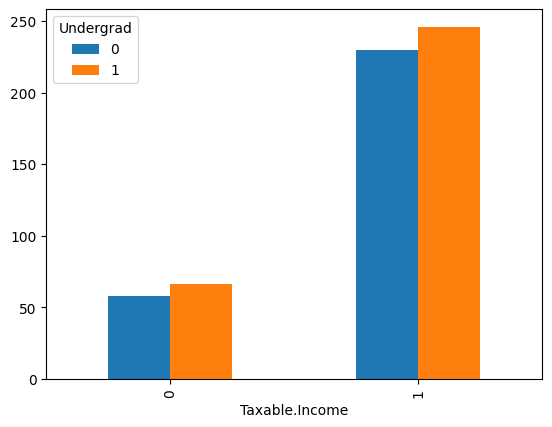

In [634]:
pd.crosstab(data['Taxable.Income'], data['Undergrad']).plot(kind='bar')

<Axes: xlabel='Taxable.Income'>

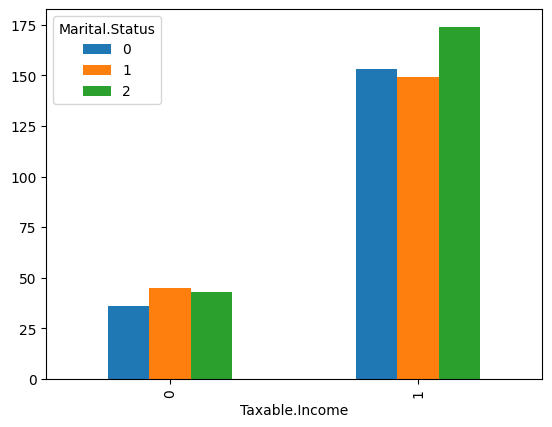

In [635]:
pd.crosstab(data['Taxable.Income'], data['Marital.Status']).plot(kind='bar')

<Axes: xlabel='Taxable.Income'>

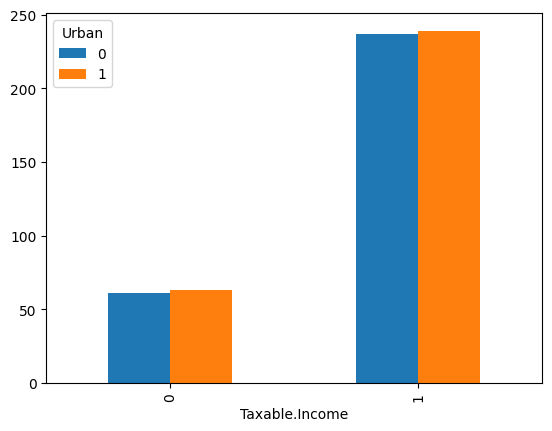

In [636]:
pd.crosstab(data['Taxable.Income'], data['Urban']).plot(kind='bar')

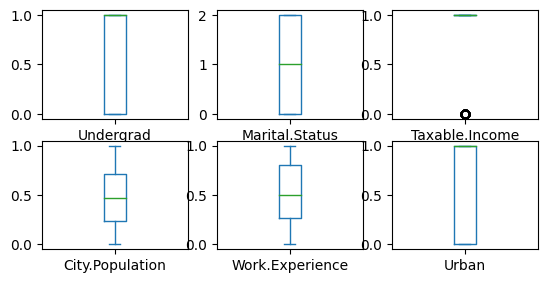

In [637]:
data.plot(kind='box', subplots=True, layout=(3,3))
plt.show();

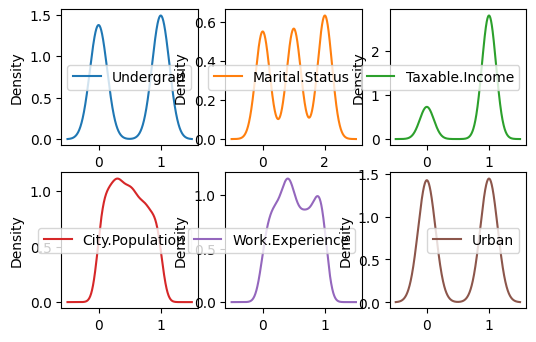

In [638]:
data.plot(kind='density', subplots=True, layout=(3,3), figsize=(6,6), sharex=False)
plt.show();

<Axes: ylabel='Undergrad'>

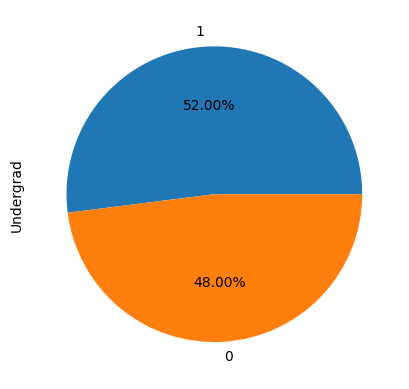

In [639]:
data['Undergrad'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='Marital.Status'>

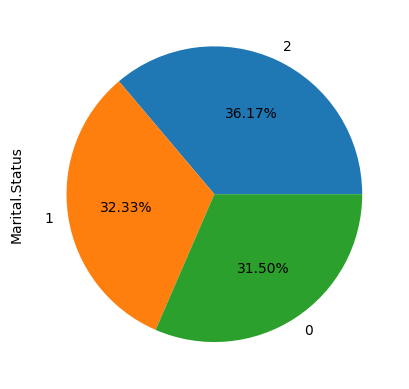

In [640]:
data['Marital.Status'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='Taxable.Income'>

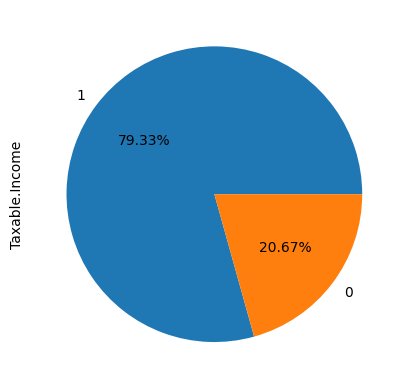

In [641]:
data['Taxable.Income'].value_counts().plot(kind='pie', autopct='%1.2f%%')       #20% of people are at risk

<Axes: ylabel='Urban'>

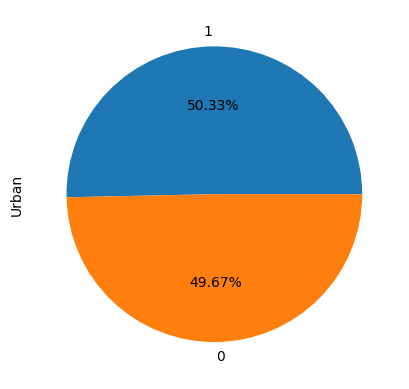

In [642]:
data['Urban'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#Model Building

In [643]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,0.139472,0.333333,1
1,1,0,1,0.622394,0.600000,1
2,0,1,1,0.772568,1.000000,1
3,1,2,1,0.962563,0.500000,1
4,0,1,1,0.010081,0.933333,0


In [644]:
X=data.drop('Taxable.Income', axis=1)
Y=data['Taxable.Income']

In [645]:
X.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1


In [646]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [647]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [648]:
X_train.shape

(480, 5)

In [649]:
Y_train.shape

(480,)

In [650]:
X_test.shape

(120, 5)

In [651]:
Y_test.shape

(120,)

#performing GridSearchCV

In [652]:
criterion=['entropy','gini']
max_depth=range(1,10)
param_grid=dict(criterion=criterion,max_depth=max_depth )
model=DecisionTreeClassifier()
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10)})

In [653]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
0.79375


In [654]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(X_train, Y_train)
pred=model.predict(X_test)

In [655]:
acc=accuracy_score(Y_test, pred)
acc

0.7916666666666666

In [656]:
pred_train=model.predict(X_train)
acc_train=accuracy_score(Y_train, pred_train)
acc_train

0.79375

In [657]:
model.feature_importances_      # the decision tree model is making predictions solely on Work.Experience

array([0., 0., 0., 1., 0.])

In [658]:
X_train.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
118,0,0,0.996529,0.333333,0


#model validation KFold

In [659]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
model=DecisionTreeClassifier(criterion='entropy', max_depth=1)
results=cross_val_score(model, X_train, Y_train, cv=kfold)
results.mean()*100

79.375

In [660]:
results_test=cross_val_score(model, X_test, Y_test, cv=kfold)
results_test.mean()*100

77.5

In [661]:
#when max_depth=3
model1=DecisionTreeClassifier(criterion='entropy', max_depth=3)
results=cross_val_score(model1, X_train, Y_train, cv=kfold)
results.mean()*100

78.95833333333331

In [662]:
results_Test=cross_val_score(model1, X_test, Y_test, cv=kfold)
results_Test.mean()*100

79.16666666666666

In [663]:
X_train.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

#visualization of model

In [664]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

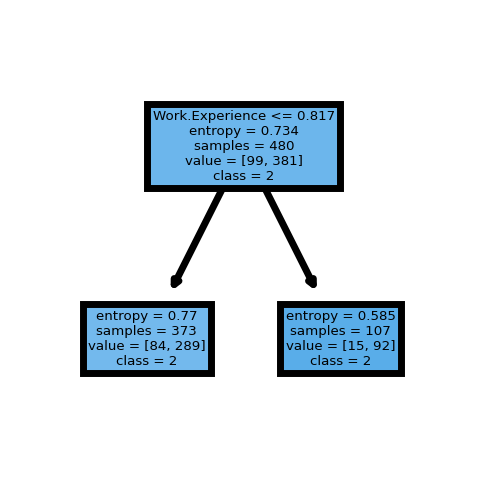

In [665]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['1','2']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(1,1), dpi=500)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)       #max_depth=1
plt.plot();

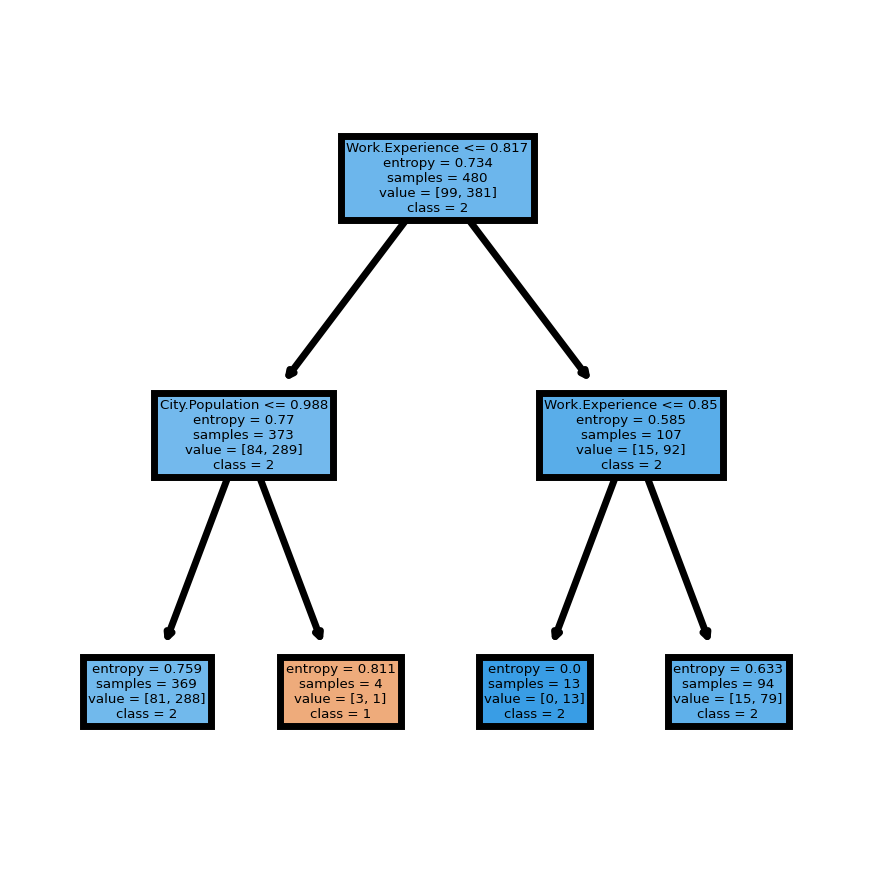

In [666]:
model1=DecisionTreeClassifier(criterion='entropy', max_depth=2)
model1.fit(X_train, Y_train)

fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['1','2']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=500)
tree.plot_tree(model1, feature_names=fn, class_names=cn, filled=True)       #max_depth=2
plt.plot();

In [667]:
model1.feature_importances_

array([0.        , 0.        , 0.38178315, 0.61821685, 0.        ])

In [668]:
X_train.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [669]:
# when max_depth=2, the 2 features considered for prediction are Work experience = 61% and City.population=38%